# Descriptive Statistics in Python

----

Author: [**Mirko M. Stojiljković**, Ph.D.](http://mmst.tech/)

Version: **1.0**

Last updated: **01 May 2019**

License: [**MIT**](https://opensource.org/licenses/MIT)

---

Copyright 2019 Mirko Stojiljković

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

----

**Descriptive statistics** is a part of statistics related to the description of data.

Python has very powerful libraries we can use for descriptive statistics:

* [`statistics`](https://docs.python.org/3/library/statistics.html) is a built-in Python library mostly convenient for smaller datasets
* [`numpy`](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html) and [`scipy`](https://docs.scipy.org/doc/scipy/reference/stats.html) are fundamental and general-purpose Python numerical libraries that provide comprehensive statistics routines suitable for working with large amounts of data
* [`pandas`](https://pandas.pydata.org/) is a library that implements most functionality of `numpy` and allows a convenient way to represent data as tables or frames
* [`statsmodels`](https://www.statsmodels.org/stable/index.html) is a library for advanced statistics

The **first part** of this notebook shows **how to determine these three types of statistical measures with Python**:

* Measures of central tendency
* Measures of variability
* Measures of joint variability

It uses the built-in library `statiscics`, as well as `numpy` and `scipy.stats`:

In [1]:
import statistics

import numpy as np
import scipy.stats as sp

The **second part** illustrates some ways to **visualize data** with [`matplotlib`](https://matplotlib.org/):

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

For more information on `matplotlib`, please check the [official documentation](https://matplotlib.org/contents.html) and [Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib).

### Population and Sample

It's important to make distinction between the population and sample. The **population** is a full collection of elements (items) of interest. The **sample** is a subset of population that hopefully preserves its important statistical features. It's usually convenient to analyze samples in order to make some conclusions related to the corresponding populations. 

### Measures of Central Tendency

Some important **measures of central tendency** are:

* mean
* harmonic mean
* geometric mean
* weighted average
* median
* mode

##### Mean

The **sample mean**, $\bar{x}$, is the arithmetic average of all the elements in a dataset:

$$\bar{x} = \frac{1}{n}\sum^n_{i=1} x_i$$

where $n$ is the number of elements in the set and $x_i$, $i=1, 2, \dots, n$, are all individual elements.

We can calculate the mean with the function `mean()` from `statistics`, as well as with `mean()` or `nanmean()` from `numpy`:

In [3]:
x = [2, 1, 3, 1.2, 8.45, 12]
x_mean = statistics.mean(x)

x_mean

4.608333333333333

In [4]:
x_mean = np.mean(x)

x_mean

4.608333333333333

If we deal with multidimensional arrays in `numpy`, we can specify the axis along which we want the mean to be calculated by `numpy.mean()`.

We can also use `.mean()` as a method of an instance of the class `numpy.ndarray`:

In [5]:
x = np.array([2, 1, 3, 1.2, 8.45, 12])
x_mean = x.mean()

x_mean

4.608333333333333

If there is `nan` in the dataset, both `mean()` from `statistics` and `mean()` from `numpy` return `nan`. It's often convenient to use `nanmean()` from `numpy` since it ignores `nan`s:

In [6]:
x = np.array([2, 1, 3, 1.2, 8.45, 12, np.nan])
x_mean, x_mean_ = np.mean(x), np.nanmean(x)

x_mean, x_mean_

(nan, 4.608333333333333)

##### Harmonic Mean

The **sample harmonic mean**, $\bar{x}_\mathrm{H}$, is another kind of average value calculated with the formula:

$$\bar{x}_\mathrm{H} = \frac{n}{\sum^n_{i=1} \frac{1}{x_i}}$$

We can calculate the harmonic mean with the function `harmonic_mean()` from `statistics`, as well as with `hmean()` from `scipy.stats`:

In [7]:
x, y = [2, 1, 3, 1.2, 8.45, 12], [0, 1, 2]
x_hmean, y_hmean = statistics.harmonic_mean(x), statistics.harmonic_mean(y)

x_hmean, y_hmean

(2.0917998968540483, 0)

In [8]:
x_hmean = sp.hmean(x)

x_hmean

2.0917998968540483

In [9]:
y_hmean = sp.hmean(y)

y_hmean

ValueError: Harmonic mean only defined if all elements greater than zero

Obviously, if there is `0` in a dataset, `statistics.harmonic_mean()` returns `0`, while `scipy.stats.hmean()` raises `ValueError`.

As with the ordinary mean, if we deal with multidimensional arrays, we can specify the axis along which we want the harmonic mean to be calculated.

##### Geometric Mean

The **sample geometric mean**, $\bar{x}_\mathrm{G}$, is yet another kind of mean calculated as:

$$\bar{x}_\mathrm{G} = \left(\prod^n_{i=1} x_i\right)^\frac{1}{n}$$

We can calculate the geometric mean with the function `gmean()` from `scipy.stats`:

In [10]:
x = [2, 1, 3, 1.2, 8.45, 12]
x_gmean = sp.gmean(x)

x_gmean

3.0007402839069046

In [11]:
y = [0, 1, 2]
y_gmean = sp.gmean(y)

y_gmean

/home/ms/anaconda3/envs/ms-sci/lib/python3.7/site-packages/scipy/stats/stats.py:308: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


0.0

If there is `0` in a dataset, `scipy.stats.gmean()` returns zero and might give `RuntimeWarning` warning.

Again, if we deal with multidimensional arrays, we can specify the axis along which we want the geometric mean to be calculated.

##### Weighted Average

The **weighted average** is used when we have the frequencies of the occurence of the particular items from a dataset. For example, we might know that ${20~\%}$ of values in our dataset are `2`s, ${30~\%}$ are `8`s and ${50~\%}$ are `0`s. We can find the mean, that is the simple average the same way as before. The alternative is using the function `average()` from `numpy`:

In [12]:
x_items, w = np.array([2, 8, 0]), np.array([0.2, 0.3, 0.5])
x_mean = np.average(x_items, weights=w)

x_mean

2.8

##### Median

The **sample median** is the middle value when the elements of a dataset are sorted in increasing or decreasing order. If we sort all elements from the dataset and if the number of elements $n$ is _odd_, the median is the value at the middle position $x_{(n+1)/2}$. If $n$ is _even_, the median is the average of two values in the middle, that is $0.5\left(x_{n/2} + x_{n/2+1}\right)$.

We can obtain the median with the function `median()` from `statistics`, as well as with `median()` and `nanmedian()` from `numpy`:

In [13]:
x, y = [2, 0, 3, 1.2, 8.45, 12], [1, 8, 2]
x_median, y_median = statistics.median(x), statistics.median(y)

sorted(x), x_median, sorted(y), y_median

([0, 1.2, 2, 3, 8.45, 12], 2.5, [1, 2, 8], 2)

In [14]:
x_median, y_median = np.median(x), np.median(y)

x_median, y_median

(2.5, 2.0)

Again, for the case of multidimensional arrays, we can specify the axis along which we want the median to be calculated.

If there is `nan` in the dataset and we want to ignore it, we should use `nanmedian()` from `numpy`. `numpy.median()` returns `nan` but also gives `RuntimeWarning`:

In [15]:
x, y = np.array([2, 0, 3, 1.2, np.nan, 8.45, 12]), np.array([1, np.nan, 8, 2])
x_median, y_median = np.median(x), np.median(y)

x_median, y_median

/home/ms/anaconda3/envs/ms-sci/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


(nan, nan)

In [16]:
x_median_, y_median_ = np.nanmedian(x), np.nanmedian(y)

x_median_, y_median_

(2.5, 2.0)

The functions `median_low()` and `median_high()` from `statistics` return actual values from the dataset in the case of an even number of elements:

In [17]:
x = [2, 0, 3, 1.2, 8.45, 12]
x_low, x_high = statistics.median_low(x), statistics.median_high(x)

sorted(x), x_low, x_high

([0, 1.2, 2, 3, 8.45, 12], 2, 3)

##### Mode

The **sample mode** is the value in the dataset that occurs most frequently. A dataset can have more than one modal value.

We can obtain the mode with the function `mode()` from `statistics`, as well as with `mode()` from `scipy.stats`:

In [18]:
x = [1.2, 0, 2, 1.2, 8, 4]
x_mode = statistics.mode(x)

x_mode

1.2

However, `statistics.mode()` doesn't support multimodal values, but raises `StatisticsError`:

In [19]:
y = [1, 1, 2, 3, 2, 4]
y_mode = statistics.mode(y)

y_mode

StatisticsError: no unique mode; found 2 equally common values

Fortunately, `scipy.stats.mode()` is more flexible here:

In [20]:
x, y = np.array([1.2, 0, 2, 1.2, 8, 4]), np.array([1, 1, 2, 3, 2, 4])
x_mode, y_mode = sp.mode(x), sp.mode(y)

x_mode, y_mode

(ModeResult(mode=array([1.2]), count=array([2])),
 ModeResult(mode=array([1]), count=array([2])))

In [21]:
x_mode.mode, x_mode.count, y_mode.mode, y_mode.count

(array([1.2]), array([2]), array([1]), array([2]))

It returns the modal value and the number of times it occurs. If there are multiple modal values, only the smallest is returned. For the case of multidimensional arrays, we can specify the axis along which we want the mode to be calculated. If there are `nan`s in the dataset, we can specify whether you want to ignore it, return `nan` or raise an exception.

### Measures of Variability

Some important **measures of variability** are:

* Variance
* Standard deviation
* Percentiles

##### Sample Variance

The **sample variance**, $s^2$, shows the spread of the data values and can be calculated with the formula:

$$s^2 = \frac{1}{n - 1}{\sum^n_{i=1} \left(x_i - \bar{x}\right)^2}$$

We can calculate the sample variance with the function `variance()` from `statistics`, as well as with `var` or `nanvar` from `numpy`:

In [22]:
x = [2, 1, 3, 1.2, 8.45, 12]
x_var = statistics.variance(x)

x_var

20.684416666666667

In [23]:
x_var = np.var(x, ddof=1)

x_var

20.684416666666664

or similarly:

In [24]:
x = np.array([2, 1, 3, 1.2, 8.45, 12])
x_var = x.var(ddof=1)

x_var

20.684416666666664

When using `numpy.var` or `numpy.nanvar`, we should specify the delta degrees of freedom, that is `ddof=1` because there is $n-1$ in the formula above.

When working with multidimensional arrays, we can provide the axis to find the variance along.

As with the sample mean, when there is `nan` in the dataset, both `variance()` from `statistics` and `var()` from `numpy` return `nan`. It's often convenient to use `nanvar()` from `numpy` since it ignores `nan`s:

In [25]:
x = np.array([2, 1, 3, 1.2, 8.45, 12, np.nan])
x_var, x_var_ = np.var(x, ddof=1), np.nanvar(x, ddof=1)

x_var, x_var_

(nan, 20.684416666666664)

The **population variance** is calculated the similar way as the sample variance, but using $n$ instead of $n-1$ in the formula above, where $n$ is the total number of elements in the entire population. It can be calculated using the function `pvariance()` from `statistics`, as well as `var()` or `nanvar()` from `numpy` with `ddof=0` (that might be omitted since it's the default behavior):

In [26]:
x = [2, 1, 3, 1.2, 8.45, 12]
x_var = statistics.pvariance(x)

x_var

17.23701388888889

In [27]:
x_var = np.var(x, ddof=0)

x_var

17.237013888888885

In [28]:
x = np.array([2, 1, 3, 1.2, 8.45, 12])
x_var = x.var()

x_var

17.237013888888885

In [29]:
x = np.array([2, 1, 3, 1.2, 8.45, 12, np.nan])
x_var, x_var_ = np.var(x), np.nanvar(x)

x_var, x_var_

(nan, 17.237013888888885)

##### Standard Deviation

The **sample standard deviation**, $s$, is the squared root of the sample variance.

We can calculate the sample standard deviation with the function `stdev()` from `statistics`, as well as with `std()` or `nanstd()` from `numpy` with `ddof=1`:

In [30]:
x = [2, 1, 3, 1.2, 8.45, 12]
x_std = statistics.stdev(x)

x_std

4.548012386380084

In [31]:
x_std = np.std(x, ddof=1)

x_std

4.548012386380083

In [32]:
x = np.array([2, 1, 3, 1.2, 8.45, 12])
x_std = x.std(ddof=1)

x_std

4.548012386380083

If there are `nan`s in the dataset of interest, `numpy.nanstd()` might be convenient since it ignores them:

In [33]:
x = np.array([2, 1, 3, 1.2, 8.45, 12, np.nan])
x_std, x_std_ = np.std(x, ddof=1), np.nanstd(x, ddof=1)

x_std, x_std_

(nan, 4.548012386380083)

As with the variance, we can specify the axis for `numpy.std()` and `numpy.nanstd()`.

The **population standard deviation** is the square root of the population variance. It can be calculated with the function `pstdev()` from `statistics`, as well as with `std()` or `nanstd()` from `numpy` with `ddof=0` (that again might be omitted as the default value):

In [34]:
x = [2, 1, 3, 1.2, 8.45, 12]
x_std = statistics.pstdev(x)

x_std

4.151748293055456

In [35]:
x_std = np.std(x, ddof=0)

x_std

4.151748293055455

In [36]:
x = np.array([2, 1, 3, 1.2, 8.45, 12])
x_std = x.std()

x_std

4.151748293055455

In [37]:
x = np.array([2, 1, 3, 1.2, 8.45, 12, np.nan])
x_std, x_std_ = np.std(x), np.nanstd(x)

x_std, x_std_

(nan, 4.151748293055455)

##### Percentile

The **sample $p$ percentile** is the value such that $p~\%$ of the elements in the dataset have the values less than or equal to it and $\left(100-p\right)~\%$ are greater than or equal to it. If there are two elements that satisfy this condition, the sample $p$ percentile is their mean. When $p=25$, $p=50$ or $p=75$, we're talking about **quartiles** since they divide sets into four parts. $p=50$ corresponds to the **median** as well.

We can calculate percentiles with the functions `percentile()` and `quantile()` from `numpy`. Their main difference is that the first takes the percentiles in the range $\text{0–100}$ (both inclusive), while the later needs them in the range $\text{0–1}$ (also inclusive):

In [38]:
x = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256])
q, q_ = np.percentile(x, [25, 50, 75]), np.quantile(x, [0.25, 0.5, 0.75])

q, q_

(array([ 4., 16., 64.]), array([ 4., 16., 64.]))

In [39]:
x = np.array([2, 0, 3, 1.2, 8.45, 12])
x_median, x_median_ = np.percentile(x, 50), np.quantile(x, 0.5)

x_median, x_median_

(2.5, 2.5)

There are also corresponding functions `numpy.nanpercentile()` and `numpy.nanquantile()` that ignore `nan`s in the dataset.

### Measures of Joint Variability 

Some important measures of the joint variability of two datasets are:

* covariance
* correlation coefficient

##### Covariance

The **sample covariance** is a measure of the strength and direction of the relationship between two samples. The stronger this relationship is, the higher is the absolute value of the covariance. If the relationship is weak, the covariance is close to zero. If larger values from one set mostly correspond to larger values from the other and vice versa, the covariance will have a positive value. Contrary, when higher values from one set correspond to lower values from the other, the covariance is negative.

Given two sample datasets, $X$ and $Y$, with $n$ elements each, where $\bar{x}$ and $\bar{y}$, are the means, while $x_i$ and $y_i$, $i=1, 2, \dots, n$, are all their elements respectively, the sample covariance between $X$ and $Y$, $s_{XY}$, is:

$$s_{XY} = \frac{1}{n - 1}{\sum^n_{i=1} \left(x_i - \bar{x}\right)\left(y_i - \bar{y}\right)}$$

We can obtain the **covariance matrix** with the function `cov()` from `numpy`:

In [40]:
x, y = np.arange(5), np.array([1, 2, 5, 8, 12])
xy_cov = np.cov(x, y)

xy_cov

array([[ 2.5,  7. ],
       [ 7. , 20.3]])

The values `{{xy_cov[0, 0]}}` and `{{xy_cov[1, 1]}}` on the main diagonal are the sample variances of `x` and `y` respectively:

In [41]:
x.var(ddof=1), y.var(ddof=1)

(2.5, 20.3)

The value `{{xy_cov[1, 0]}}` is the sample covariance between `x` and `y`.

We can obtain the **population covariance** by replacing $n-1$ with $n$ in the formula above, where $n$ is the size of both populations. The function `numpy.cov()` allows us to calculate the population covariance by specifying the arguments `ddof=0` or `bias=True`.

##### Correlation Coefficient

The **correlation coefficient**, $r$, is a normalized version of the covariance. It can be calculated as:

$$r = \frac{s_{XY}}{s_X s_Y}$$

where $s_X$ and $s_Y$ are the standard deviations of $X$ and $Y$ respectively. $r$ can be between $-1$ (denoting the perfect negative linear relationship) and $1$ (representing the prefect positive linear relationship). The value $r=0$ corresponds to the case of no relationship.

We can calculate the correlation coefficient with the function `corrcoef()` from `numpy`:

In [42]:
x, y = np.arange(5), np.array([1, 2, 5, 8, 12])
r = np.corrcoef(x, y)

r

array([[1.        , 0.98260737],
       [0.98260737, 1.        ]])

The values `1` on the main diagonal of the resulting matrix denote the correlation coefficient between `x` and `x`, as well as between `y` and `y`. The value `{{np.round(r[0, 1], decimals=2)}}` is the correlation coefficient between `x` and `y`.

### Data Visualization

Data visualization is very important in statistics and machine learning. In many cases, it offers a convenient way to represent data.

This notebook shows several simple examples how to create some important types of charts with `matplotlib`:

* Simple $x$-$y$ plot
* Pie chart
* Histogram
* Bar chart
* Box plot
* Visual representation of covariance and correlation matrices

We might specify more properties for each of these charts, but it's beyond the scope of this notebook.

We'll need some random data, so let's first create a pseudo-random number generator:

In [43]:
rng = np.random.RandomState(seed=0)

##### Simple $x$-$y$ Plot

We can create a simple **$x$-$y$ plot** with the function `plot()` from `matplotlib.pyplot`:

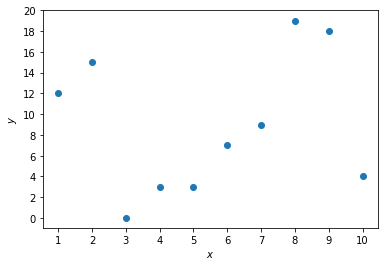

In [44]:
x, y = np.arange(1, 11), rng.randint(20, size=(10))

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_xticks(x)
ax.set_yticks(np.arange(0, 21, 2))
plt.show()

##### Pie Chart

A **pie chart** a is nice way to show a percentage related to each value in a dataset. We can obtain it with the function `pie`:

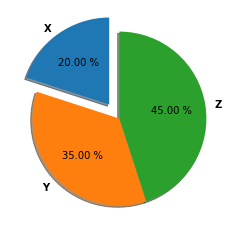

In [45]:
labels, sizes = ('$\mathbf{X}$', '$\mathbf{Y}$', '$\mathbf{Z}$'), (2, 3.5, 4.5)
explode = (0.2, 0, 0)

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, explode=explode, shadow=True, startangle=90,
       autopct='%1.2f %%',)
plt.show()

##### Histogram

A **histogram** divides the range of values into intervals (bins) and shows the number of values or the frequency for each interval. We can create it with the `hist` function. An important parameter is `cumulative` that specifies whether the histogram shows regular (left) or cumulative data (right):

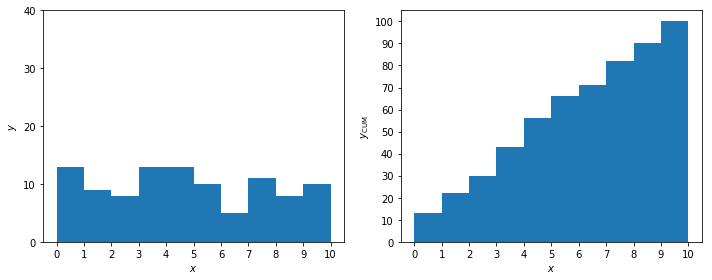

In [46]:
x, bins = rng.randint(10, size=100), np.arange(11)

is_cumulative = (False, True)
y_labels = (r'$y$', r'$y_\mathrm{CUM}$')
y_ticks = (41, 101)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(0.4))
for i, item in enumerate(axes):
    item.hist(x, bins, cumulative=is_cumulative[i])
    item.set_xlabel(r'$x$')
    item.set_ylabel(y_labels[i])
    item.set_xticks(bins)
    item.set_yticks(np.arange(0, y_ticks[i], 10))
plt.tight_layout()
plt.show()

##### Bar Chart

Unlike a histogram, **bar chart** shows the relations between two datasets, as well as the estimated errors. We can get it using the functions `bar()` (for vertical bars) or `barh()` (for horizontal bars): 

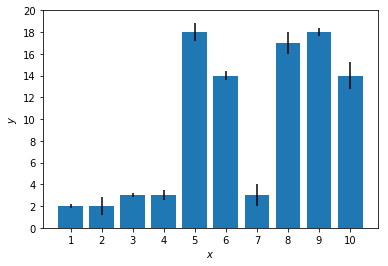

In [47]:
x, y, y_err = np.arange(1, 11), rng.randint(20, size=(10)), rng.randn(10)

fig, ax = plt.subplots()
ax.bar(x, height=y, width=0.8, yerr=y_err, bottom=0, align='center')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_xticks(x)
ax.set_yticks(np.arange(0, 21, 2))
plt.show()

##### Box Plot

A **boxplot** shows data divided into four quartiles, as well as the outliers, mean and median. We can make it with the function `boxplot()`, where the parameter `vert` specifies whether it's horizontal or vertical:

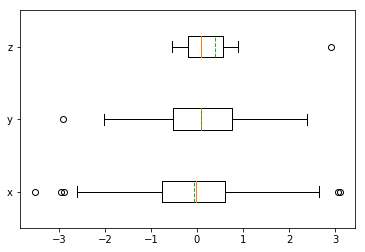

In [48]:
x, y, z = rng.randn(1000), rng.randn(100), rng.randn(10)

fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, meanline=True, showmeans=True,
           labels=('x', 'y', 'z'))
plt.show()

##### Covariance and Correlation Matrices

We can use `matplotlib.pyplot.matshow()` to represent a matrix visually. This functionality can be conveniently applied to the covariance and correlation matrices.

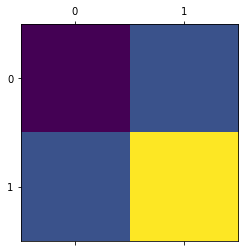

In [49]:
x, y = np.arange(5), np.array([1, 2, 5, 8, 12])

fig, ax = plt.subplots()
ax.matshow(np.cov(x, y))
plt.show()

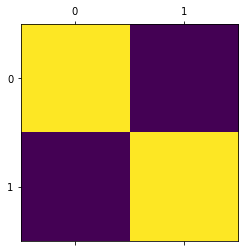

In [50]:
fig, ax = plt.subplots()
ax.matshow(np.corrcoef(x, y))
plt.show()

### Conclusion

This notebook shows how to use Python, `numpy`, and `scipy` for **descriptive statistics**. Both `numpy` and `scipy` contain many statistical (and other) routines not mentioned here. They are certainly worth further exploration.

This notebook also shows hot to use `matplotlib` to **visualize data**. It just scratches the surface of what's possible. There are many types of charts and parameters that can be used to customize the look of them. There are also other data visualization Python libraries like [`seaborn`](https://seaborn.pydata.org/), [`bokeh`](https://bokeh.pydata.org/en/latest/), and others. They are also worth exploring.

----

Author: [**Mirko M. Stojiljković**, Ph.D.](http://mmst.tech/) [@MMStojiljkovic](https://twitter.com/MMStojiljkovic)